In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import statsmodels.api as sm

In [2]:
# %matplotlib inline

# Load SAT dataset
sat_data = pd.read_csv('CASE1201.ASC.txt', delim_whitespace=True)

In [3]:
print(sat_data.head()) # Print first 5 rows of the dataset

         state   sat  takers  income  years  public  expend  rank
0         Iowa  1088       3     326  16.79    87.8   25.60  89.7
1  SouthDakota  1075       2     264  16.07    86.2   19.95  90.6
2  NorthDakota  1068       3     317  16.57    88.3   20.62  89.8
3       Kansas  1045       5     338  16.30    83.9   27.14  86.3
4     Nebraska  1045       5     293  17.25    83.6   21.05  88.5


In [4]:
print(sat_data.describe()) # Get basic statistics of numerical columns

               sat     takers      income      years     public     expend  \
count    50.000000  50.000000   50.000000  50.000000  50.000000  50.000000   
mean    947.940000  26.220000  293.980000  16.209200  81.204000  22.965600   
std      70.856397  22.022521   43.693034   0.699982   9.830917   6.144932   
min     790.000000   2.000000  208.000000  14.390000  44.800000  13.840000   
25%     889.250000   6.250000  261.500000  15.910000  76.925000  19.592500   
50%     966.000000  16.000000  295.000000  16.360000  80.800000  21.610000   
75%     998.500000  47.750000  325.000000  16.757500  88.250000  26.387500   
max    1088.000000  69.000000  401.000000  17.410000  97.000000  50.100000   

            rank  
count  50.000000  
mean   79.988000  
std     6.523072  
min    69.800000  
25%    74.025000  
50%    80.850000  
75%    85.825000  
max    90.600000  


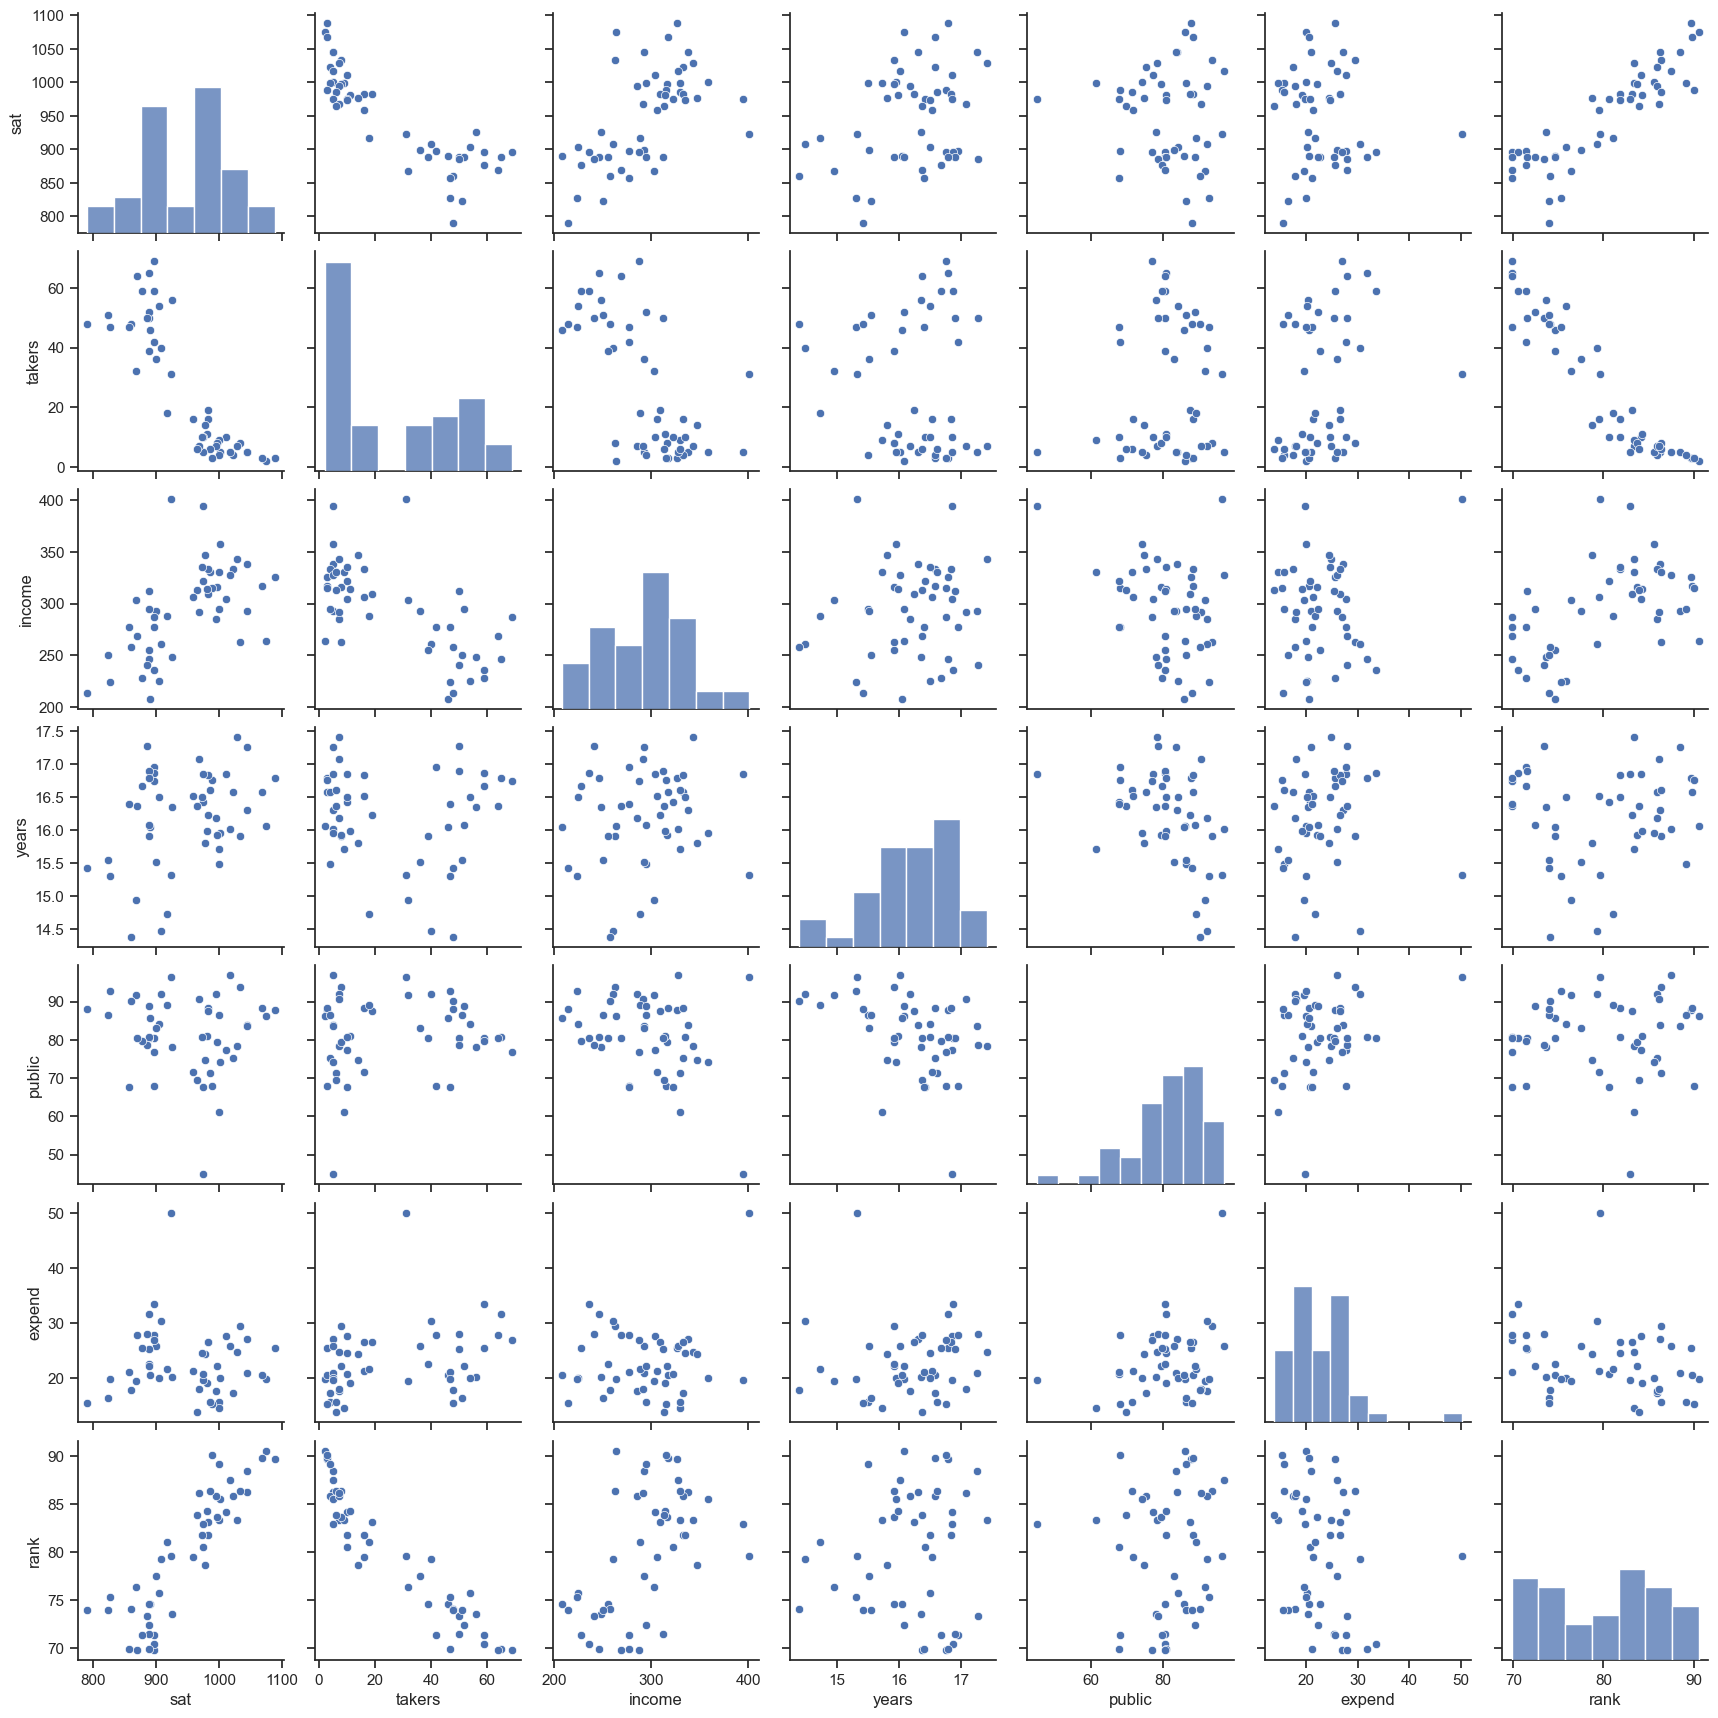

In [5]:
# Data visualization
sns.set(style="ticks", color_codes=True) # Set seaborn style
sns.pairplot(sat_data) # Plot pairwise relationships of columns
plt.show() # Show the plot

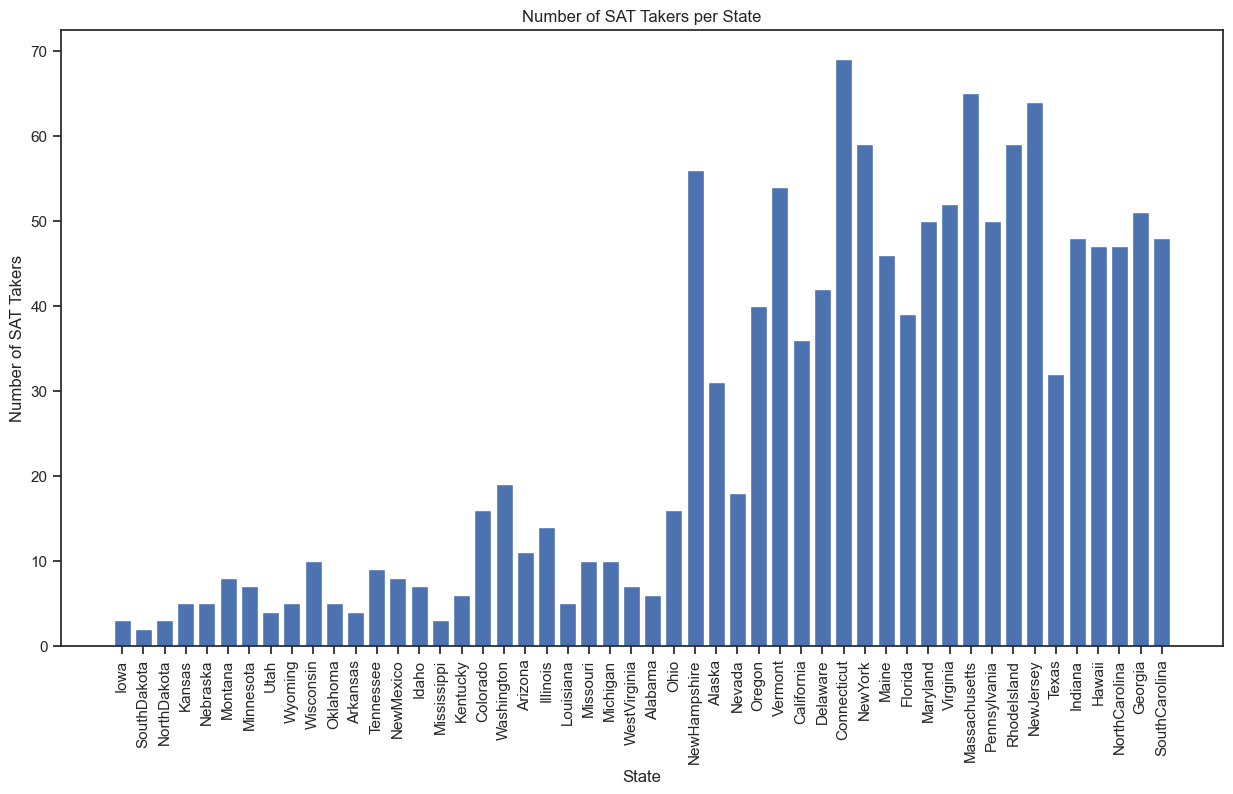

In [6]:
plt.figure(figsize=(15,8))
plt.bar(sat_data['state'], sat_data['takers'])
plt.title('Number of SAT Takers per State')
plt.xlabel('State')
plt.ylabel('Number of SAT Takers')
plt.xticks(rotation=90)
plt.show()

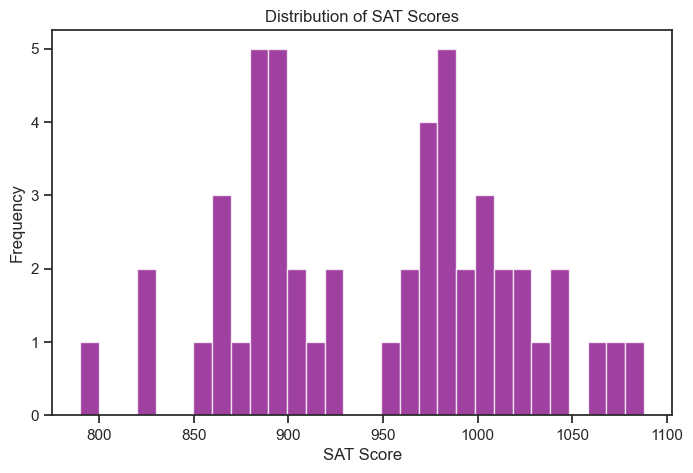

In [7]:
plt.figure(figsize=(8,5))
plt.hist(sat_data['sat'], bins=30, color='purple', alpha=0.75)
plt.title('Distribution of SAT Scores')
plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.show()

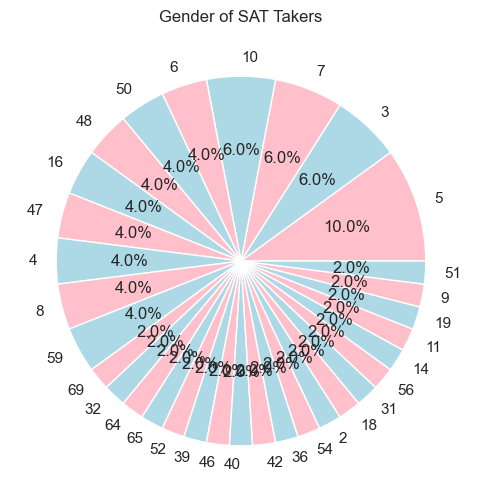

In [8]:
plt.figure(figsize=(6,6))
plt.pie(sat_data['takers'].value_counts(), labels=sat_data['takers'].value_counts().index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender of SAT Takers')
plt.show()

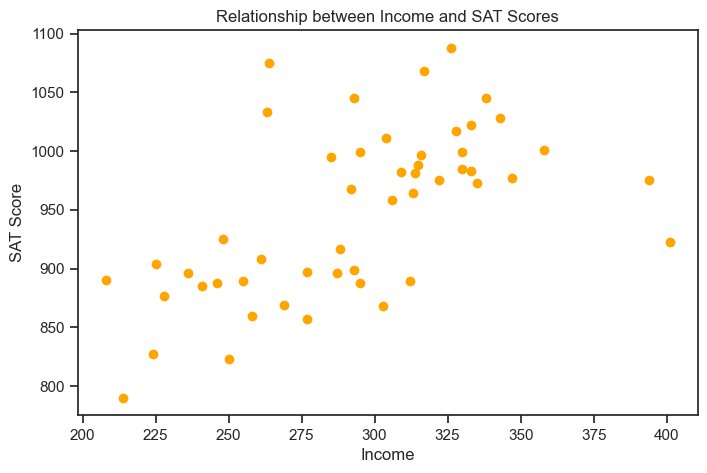

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(sat_data['income'], sat_data['sat'], color='orange')
plt.title('Relationship between Income and SAT Scores')
plt.xlabel('Income')
plt.ylabel('SAT Score')
plt.show()

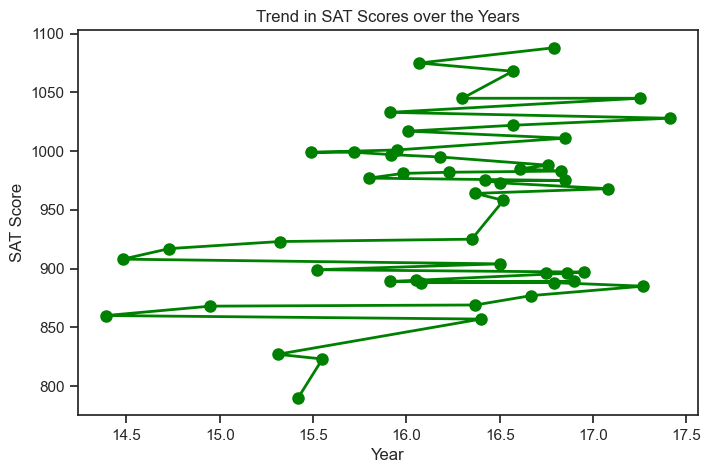

In [10]:
plt.figure(figsize=(8,5))
plt.plot(sat_data['years'], sat_data['sat'], color='green', linewidth=2, marker='o', markersize=8)
plt.title('Trend in SAT Scores over the Years')
plt.xlabel('Year')
plt.ylabel('SAT Score')
plt.show()

In [11]:
# Split into features (takers) and target (total scores)
X = sat_data.iloc[:, 2:]
y = sat_data.iloc[:, 1]

In [12]:
# Simple linear regression model (intercept + takers)
X_sm = sm.add_constant(X)
X_np = X_sm.to_numpy()
sm_model = sm.OLS(y, X_np).fit()
lin_reg = LinearRegression()
lin_reg.fit(X.iloc[:, 1].to_numpy().reshape(-1, 1), y)
r2_simple = lin_reg.score(X.iloc[:, 1].to_numpy().reshape(-1, 1), y)
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sat   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           4.16e-18
Time:                        17:04:11   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.6591    211.510     -0.448      0.6

In [13]:
#variance of the model
sm_model.mse_resid

694.0096811635749

In [14]:
# Confidence intervals
print(sm_model.conf_int(alpha=0.05))  # 95% confidence interval
print(sm_model.conf_int(alpha=0.01))  # 99% confidence interval

                0           1
const -521.208836  331.890618
x1      -1.879081    0.918921
x2      -0.315454    0.299064
x3       9.875525   35.344639
x4      -1.632027    0.703722
x5       0.505939    3.918071
x6       4.225419   12.727015
                0           1
const -664.699028  475.380810
x1      -2.349701    1.389541
x2      -0.418815    0.402425
x3       5.591653   39.628510
x4      -2.024897    1.096592
x5      -0.067977    4.491987
x6       2.795462   14.156972


In [15]:
# Full linear regression model
lin_model = sm.OLS(y,X).fit()
lin_reg = LinearRegression()
lin_reg.fit(X, y)
r2_full = lin_reg.score(X, y)
print(lin_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    sat   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.104e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                    3.34e-68
Time:                        17:04:11   Log-Likelihood:                         -230.85
No. Observations:                  50   AIC:                                      473.7
Df Residuals:                      44   BIC:                                      485.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
#variance of the model
lin_model.mse_resid

681.3959371638322

In [17]:
# Confidence intervals
print(lin_model.conf_int(alpha=0.05))  # 95% confidence interval
print(lin_model.conf_int(alpha=0.01))  # 99% confidence interval

                0          1
takers  -1.538083   0.072718
income  -0.304558   0.218468
years   10.129232  32.467150
public  -1.645411   0.645018
expend   0.682682   3.941386
rank     4.948479  10.607072
               0          1
takers -1.808597   0.343231
income -0.392393   0.306304
years   6.377863  36.218519
public -2.030059   1.029666
expend  0.135424   4.488644
rank    3.998190  11.557361


#### ANOVA for model selection

                            OLS Regression Results                            
Dep. Variable:                    sat   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           4.16e-18
Time:                        17:04:11   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.6591    211.510     -0.448      0.6

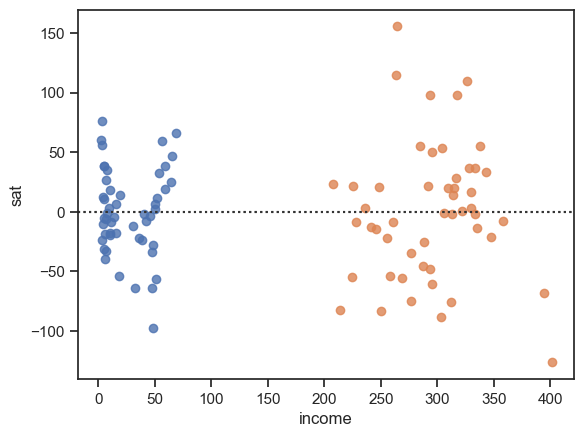

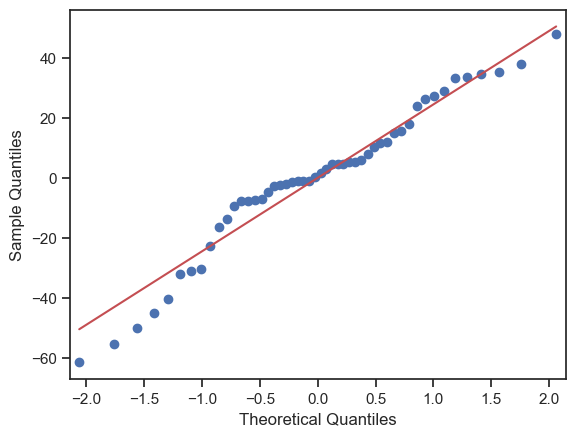

In [18]:
"""# Control Regaression"""

control_model = sm.OLS(y, sm.add_constant(X)).fit()
print(control_model.summary())

anova_lm(lin_model,control_model)

sns.residplot(y = 'sat',x = 'takers', data = sat_data)

sns.residplot(y = 'sat',x = 'income', data = sat_data);

fig = sm.graphics.qqplot(lin_model.resid, line='s')
plt.show()

In [19]:
corr_matrix = X.corr()
print(corr_matrix)

          takers    income     years    public    expend      rank
takers  1.000000 -0.661935 -0.101544  0.123556  0.283630 -0.942833
income -0.661935  1.000000  0.134762 -0.306567  0.131519  0.532700
years  -0.101544  0.134762  1.000000 -0.417118  0.059829  0.070224
public  0.123556 -0.306567 -0.417118  1.000000  0.284591  0.050624
expend  0.283630  0.131519  0.059829  0.284591  1.000000 -0.264969
rank   -0.942833  0.532700  0.070224  0.050624 -0.264969  1.000000


In [20]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_pca, y)
r2_pca = lin_reg_pca.score(X_pca, y)

In [21]:
# Calculate F1 and P(F1) for each model
f1_simple, pval_simple = f_regression(X.iloc[:, 1].to_numpy().reshape(-1, 1), y)
f1_full, pval_full = f_regression(X, y)
f1_pca, pval_pca = f_regression(X_pca, y)

In [22]:
print("Simple Linear Regression Model:")
print(f"R^2: {r2_simple:.3f}")
print(f"F1: {f1_simple[0]:.3f}")
print(f"P(F1): {pval_simple[0]:.3f}")

print("Full Linear Regression Model:")
print(f"R^2: {r2_full:.3f}")
print(f"F1: {f1_full[0]:.3f}")
print(f"P(F1): {pval_full[0]:.3f}")

print("PCA Model:")
print(f"R^2: {r2_pca:.3f}")
print(f"F1: {f1_pca[0]:.3f}")
print(f"P(F1): {pval_pca[0]:.3f}")

Simple Linear Regression Model:
R^2: 0.342
F1: 24.904
P(F1): 0.000
Full Linear Regression Model:
R^2: 0.879
F1: 133.707
P(F1): 0.000
PCA Model:
R^2: 0.733
F1: 37.864
P(F1): 0.000


In [23]:
# Simple linear regression model (intercept + takers) with PCA
X_sm_pca = sm.add_constant(X_pca)
sm_model_pca = sm.OLS(y, X_sm_pca).fit()
print(sm_model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                    sat   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     64.67
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.20e-14
Time:                        17:04:11   Log-Likelihood:                -250.42
No. Observations:                  50   AIC:                             506.8
Df Residuals:                      47   BIC:                             512.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        947.9400      5.282    179.458      0.0

In [24]:
# Full linear regression model with PCA
lin_model_pca = sm.OLS(y,X_pca).fit()
print(lin_model_pca.summary())

                                 OLS Regression Results                                
Dep. Variable:                    sat   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.038
Method:                 Least Squares   F-statistic:                            0.09625
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                       0.908
Time:                        17:04:11   Log-Likelihood:                         -413.70
No. Observations:                  50   AIC:                                      831.4
Df Residuals:                      48   BIC:                                      835.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
# Feature selection using filter method (SelectKBest)
selector = SelectKBest(f_regression, k=2)
X_new = selector.fit_transform(X, y)
selected_features_filter = np.array(X.columns[selector.get_support()])
print(selected_features_filter)

['takers' 'rank']


In [26]:
# Feature selection using wrapper method (RFE)
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, y)
selected_features_wrapper = np.array(X.columns[selector.support_])
print(selected_features_wrapper)

['years' 'rank']


In [27]:
# Feature selection using embedded method (SelectFromModel)
estimator = LinearRegression()
selector = SelectFromModel(estimator)
selector = selector.fit(X, y)
selected_features_embedded = np.array(X.columns[selector.get_support()])
print(selected_features_embedded)

['years' 'rank']


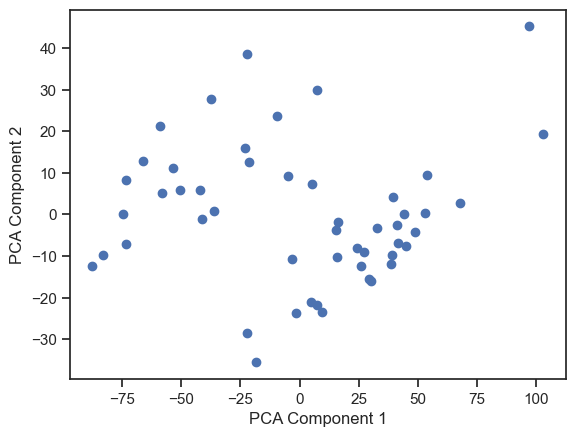

In [28]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()